## SECP3223-02 Project - WHO TB Infection Estimates in Household Contacts

## Group DataPioneers

### Muhammad Nur Azhar Bin Mohd Yazid (A22EC0220) - Project Lead
### Che Marhumi Bin Che Ab Rahim (A22EC0147)
### Muhammad Safwan Bin Mohd Azmi (A22EC0221)

# Data Dictionary for LTBI Estimates Dataset

| **Column Name**                 | **Description**                                                                                     | **Data Type** |
|----------------------------------|-----------------------------------------------------------------------------------------------------|---------------|
| `country`                       | Name of the country                                                                                 | Category      |
| `iso2`                          | 2-letter ISO country code (some missing values)                                                     | Category      |
| `iso3`                          | 3-letter ISO country code                                                                            | Category      |
| `iso_numeric`                   | Numeric ISO country code                                                                             | Integer       |
| `g_whoregion`                   | WHO regional affiliation                                                                             | Category      |
| `year`                          | Year of the estimate                                                                                 | Integer       |
| `source_hh`                     | Source of household size data                                                                        | Category      |
| `e_hh_size`                     | Estimated average household size                                                                     | Float         |
| `prevtx_data_available`         | Indicator of whether previous treatment data is available                                            | Float         |
| `newinc_con_prevtx`             | New TB cases in contacts with previous treatment (partially available)                              | Float         |
| `newinc_con04_prevtx`           | New TB cases in children under 5 years in contacts with previous treatment                           | Float         |
| `ptsurvey_newinc`               | TB prevalence survey data for new cases (highly missing data)                                        | Float         |
| `ptsurvey_newinc_con04_prevtx`  | TB prevalence survey data for children under 5 years (highly missing data)                          | Float         |
| `e_hh_contacts`                 | Estimated total household contacts                                                                   | Float         |
| `e_hh_contacts_lo`              | Lower bound of estimated household contacts                                                         | Float         |
| `e_hh_contacts_hi`              | Upper bound of estimated household contacts                                                         | Float         |
| `e_prevtx_hh_contacts_pct`      | Percentage of household contacts with previous TB treatment                                          | Float         |
| `e_prevtx_hh_contacts_pct_lo`   | Lower bound of percentage of household contacts with previous TB treatment                          | Float         |
| `e_prevtx_hh_contacts_pct_hi`   | Upper bound of percentage of household contacts with previous TB treatment                          | Float         |
| `e_prevtx_eligible`             | Estimated number of individuals eligible for treatment                                               | Float         |
| `e_prevtx_eligible_lo`          | Lower bound of estimated individuals eligible for treatment                                          | Float         |
| `e_prevtx_eligible_hi`          | Upper bound of estimated individuals eligible for treatment                                          | Float         |
| `e_prevtx_kids_pct`             | Percentage of eligible individuals who are children                                                  | Float         |
| `e_prevtx_kids_pct_lo`          | Lower bound of the percentage of eligible children                                                   | Float         |
| `e_prevtx_kids_pct_hi`          | Upper bound of the percentage of eligible children                                                   | Float         |
| `household_contact_rate`        | Calculated as the total estimated household contacts (`e_hh_contacts`) divided by the average household size (`e_hh_size`). Represents the average number of TB contacts per household member. | Float         |
| `eligible_pct`                  | Calculated as the percentage of household contacts eligible for treatment. Derived as (`e_prevtx_eligible` / `e_hh_contacts`) * 100. Represents the proportion of household contacts eligible for further TB treatment. | Float         |

## Research Questions Related to the Dataset

1. Which countries or regions have the highest household contact rates for TB, and what factors might contribute to these rates?

2. What percentage of household contacts with previous TB treatment (e.g., e_prevtx_hh_contacts_pct) are eligible for further treatment, and how does this vary by country or region?

3. Is there a correlation between household size (e_hh_size) and the percentage of contacts with prior treatment (e_prevtx_hh_contacts_pct)?

4. What are the key predictors of household contact rates (household_contact_rate), and how well can these be used to predict future rates?

5. Have household contact rates or treatment eligibility improved over time (e.g., from 2015 to 2020), and are there any noticeable trends?

## Part A: Data Cleaning & Data Preparation
### Step 1: Load the dataset

In [205]:
import pandas as pd

# Load the dataset
file_path = 'LTBI_estimates.csv'
tb_data = pd.read_csv(file_path)

# Overview of missing values before cleaning
print("Missing values before cleaning:")
print(tb_data.isnull().sum())


Missing values before cleaning:
country                            0
iso2                               9
iso3                               0
iso_numeric                        0
g_whoregion                        0
year                               0
source_hh                          0
e_hh_size                          0
prevtx_data_available            146
newinc_con_prevtx                957
newinc_con04_prevtx              642
ptsurvey_newinc                 1696
ptsurvey_newinc_con04_prevtx    1696
e_hh_contacts                     18
e_hh_contacts_lo                  18
e_hh_contacts_hi                  18
e_prevtx_hh_contacts_pct         644
e_prevtx_hh_contacts_pct_lo      644
e_prevtx_hh_contacts_pct_hi      644
e_prevtx_eligible                 18
e_prevtx_eligible_lo              18
e_prevtx_eligible_hi              18
e_prevtx_kids_pct                603
e_prevtx_kids_pct_lo             603
e_prevtx_kids_pct_hi             603
dtype: int64


### Step 2: Drop Columns with Excessive Missing Values

In [206]:
# Add specific columns to drop
columns_to_drop = ['newinc_con_prevtx', 'newinc_con04_prevtx', 'ptsurvey_newinc', 'ptsurvey_newinc_con04_prevtx', 'iso2', 'iso3', 'iso_numeric', 'source_hh']
columns_to_drop.extend(columns_to_drop)

# Drop the columns
tb_data_cleaned = tb_data.drop(columns=columns_to_drop)

print(f"Columns dropped: {columns_to_drop}")


Columns dropped: ['newinc_con_prevtx', 'newinc_con04_prevtx', 'ptsurvey_newinc', 'ptsurvey_newinc_con04_prevtx', 'iso2', 'iso3', 'iso_numeric', 'source_hh', 'newinc_con_prevtx', 'newinc_con04_prevtx', 'ptsurvey_newinc', 'ptsurvey_newinc_con04_prevtx', 'iso2', 'iso3', 'iso_numeric', 'source_hh']


### Step 3a: Handling Missing Values in Numeric Columns with Median

In [207]:
# Handle missing values in numeric columns
numeric_cols = tb_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    if tb_data_cleaned[col].isnull().sum() > 0:
        tb_data_cleaned[col].fillna(tb_data_cleaned[col].median(), inplace=True)


C:\Users\MNAZHAR\AppData\Local\Temp\ipykernel_12320\743980646.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tb_data_cleaned[col].fillna(tb_data_cleaned[col].median(), inplace=True)


### Step 4: Handle Missing Values in Categorical Columns with Mode

In [208]:
# Handle missing values in categorical columns
categorical_cols = tb_data_cleaned.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if tb_data_cleaned[col].isnull().sum() > 0:
        tb_data_cleaned[col].fillna(tb_data_cleaned[col].mode()[0], inplace=True)


### Step 5: Replace Zeros in Critical Columns

In [209]:
# Replace zeroes with median for critical numeric columns
critical_cols = ['e_hh_contacts', 'e_hh_size', 'e_prevtx_eligible']
for col in critical_cols:
    if col in tb_data_cleaned.columns:
        tb_data_cleaned[col] = tb_data_cleaned[col].replace(0, tb_data_cleaned[col].median())


### Step 6: Verify the Data Cleaning

In [210]:
# Overview of missing values after cleaning
print("Missing values after cleaning:")
print(tb_data_cleaned.isnull().sum())

tb_data_cleaned.info()
print()
tb_data_cleaned.describe()

Missing values after cleaning:
country                        0
g_whoregion                    0
year                           0
e_hh_size                      0
prevtx_data_available          0
e_hh_contacts                  0
e_hh_contacts_lo               0
e_hh_contacts_hi               0
e_prevtx_hh_contacts_pct       0
e_prevtx_hh_contacts_pct_lo    0
e_prevtx_hh_contacts_pct_hi    0
e_prevtx_eligible              0
e_prevtx_eligible_lo           0
e_prevtx_eligible_hi           0
e_prevtx_kids_pct              0
e_prevtx_kids_pct_lo           0
e_prevtx_kids_pct_hi           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      1710 non-null   object 
 1   g_whoregion                  1710 non-null   object 
 2   year                         1710 non-null   int64 

,year,e_hh_size,prevtx_data_available,e_hh_contacts,e_hh_contacts_lo,e_hh_contacts_hi,e_prevtx_hh_contacts_pct,e_prevtx_hh_contacts_pct_lo,e_prevtx_hh_contacts_pct_hi,e_prevtx_eligible,e_prevtx_eligible_lo,e_prevtx_eligible_hi,e_prevtx_kids_pct,e_prevtx_kids_pct_lo,e_prevtx_kids_pct_hi
count,1710.000000,1710.000000,1710.000000,1.710000e+03,1.710000e+03,1.710000e+03,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000
mean,2019.000000,4.032526,40.973684,5.427519e+04,5.290911e+04,5.562178e+04,15.479661,15.158187,15.858895,6842.275982,6190.864930,7498.536830,55.360123,50.652146,60.685977
std,2.582744,1.364509,27.980075,2.396066e+05,2.341210e+05,2.460839e+05,19.997558,19.716868,20.274626,27431.983421,24991.634353,29926.958518,30.117366,29.902866,30.393728
min,2015.000000,2.070000,0.000000,1.100000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,2.850000,1.000000,4.600000e+02,4.300000e+02,4.500000e+02,7.100000,6.900000,7.300000,14.000000,8.600000,15.250000,36.000000,33.000000,41.000000
50%,2019.000000,3.880000,60.000000,4.500000e+03,4.400000e+03,4.600000e+03,9.550000,9.350000,9.850000,250.000000,180.000000,325.000000,54.000000,47.000000,62.000000
75%,2021.000000,4.920000,60.000000,2.200000e+04,2.175000e+04,2.300000e+04,13.000000,13.000000,13.000000,2900.000000,2575.000000,3275.000000,76.750000,67.000000,93.000000
max,2023.000000,8.660000,66.000000,3.500000e+06,3.400000e+06,3.600000e+06,100.000000,100.000000,100.000000,350000.000000,310000.000000,380000.000000,100.000000,100.000000,100.000000


In [211]:
# Save cleaned dataset for further use
tb_data_cleaned.to_csv('LTBI_estimates_cleaned.csv', index=False)
print("Cleaned dataset saved as 'LTBI_estimates_cleaned.csv'.")

Cleaned dataset saved as 'LTBI_estimates_cleaned.csv'.


## Part B: Data Preparation

### Step 1: Load the Cleaned Dataset

In [212]:
# Load the cleaned dataset
file_path_cleaned = 'LTBI_estimates_cleaned.csv'
tb_data_prepared = pd.read_csv(file_path_cleaned)

# Verify the loaded data
print("Loaded cleaned dataset:")
print(tb_data_prepared.head())


Loaded cleaned dataset:
       country g_whoregion  year  e_hh_size  prevtx_data_available  \
0  Afghanistan         EMR  2015       8.04                   60.0   
1  Afghanistan         EMR  2016       8.04                   60.0   
2  Afghanistan         EMR  2017       8.04                   60.0   
3  Afghanistan         EMR  2018       8.04                   60.0   
4  Afghanistan         EMR  2019       8.04                   60.0   

   e_hh_contacts  e_hh_contacts_lo  e_hh_contacts_hi  \
0       120000.0          110000.0          120000.0   
1       130000.0          130000.0          130000.0   
2       140000.0          130000.0          140000.0   
3       140000.0          140000.0          150000.0   
4       170000.0          160000.0          170000.0   

   e_prevtx_hh_contacts_pct  e_prevtx_hh_contacts_pct_lo  \
0                       8.7                          8.5   
1                      12.0                         12.0   
2                      35.0           

### Step 2: Create Derived Features

- household_contact_rate: Total household contacts divided by household size.

- eligible_pct: Percentage of eligible household contacts for treatment.

In [213]:
# Create derived features
tb_data_prepared['household_contact_per_people'] = (tb_data_prepared['e_hh_contacts'] / tb_data_prepared['e_hh_size']).round(2)
tb_data_prepared['eligible_percent'] = ((tb_data_prepared['e_prevtx_eligible'] / tb_data_prepared['e_hh_contacts']) * 100).round(2)

print("Derived features created: 'household_contact_per_people', 'eligible_percent'.")


Derived features created: 'household_contact_per_people', 'eligible_percent'.


In [214]:
tb_data_prepared.info()
print()
tb_data_prepared.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1710 non-null   object 
 1   g_whoregion                   1710 non-null   object 
 2   year                          1710 non-null   int64  
 3   e_hh_size                     1710 non-null   float64
 4   prevtx_data_available         1710 non-null   float64
 5   e_hh_contacts                 1710 non-null   float64
 6   e_hh_contacts_lo              1710 non-null   float64
 7   e_hh_contacts_hi              1710 non-null   float64
 8   e_prevtx_hh_contacts_pct      1710 non-null   float64
 9   e_prevtx_hh_contacts_pct_lo   1710 non-null   float64
 10  e_prevtx_hh_contacts_pct_hi   1710 non-null   float64
 11  e_prevtx_eligible             1710 non-null   float64
 12  e_prevtx_eligible_lo          1710 non-null   float64
 13  e_p

,year,e_hh_size,prevtx_data_available,e_hh_contacts,e_hh_contacts_lo,e_hh_contacts_hi,e_prevtx_hh_contacts_pct,e_prevtx_hh_contacts_pct_lo,e_prevtx_hh_contacts_pct_hi,e_prevtx_eligible,e_prevtx_eligible_lo,e_prevtx_eligible_hi,e_prevtx_kids_pct,e_prevtx_kids_pct_lo,e_prevtx_kids_pct_hi,household_contact_per_people,eligible_percent
count,1710.000000,1710.000000,1710.000000,1.710000e+03,1.710000e+03,1.710000e+03,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000,1710.000000
mean,2019.000000,4.032526,40.973684,5.427519e+04,5.290911e+04,5.562178e+04,15.479661,15.158187,15.858895,6842.275982,6190.864930,7498.536830,55.360123,50.652146,60.685977,12445.914497,9.142275
std,2.582744,1.364509,27.980075,2.396066e+05,2.341210e+05,2.460839e+05,19.997558,19.716868,20.274626,27431.983421,24991.634353,29926.958518,30.117366,29.902866,30.393728,54783.357426,6.929037
min,2015.000000,2.070000,0.000000,1.100000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.490000,0.320000
25%,2017.000000,2.850000,1.000000,4.600000e+02,4.300000e+02,4.500000e+02,7.100000,6.900000,7.300000,14.000000,8.600000,15.250000,36.000000,33.000000,41.000000,145.722500,2.500000
50%,2019.000000,3.880000,60.000000,4.500000e+03,4.400000e+03,4.600000e+03,9.550000,9.350000,9.850000,250.000000,180.000000,325.000000,54.000000,47.000000,62.000000,1273.795000,8.050000
75%,2021.000000,4.920000,60.000000,2.200000e+04,2.175000e+04,2.300000e+04,13.000000,13.000000,13.000000,2900.000000,2575.000000,3275.000000,76.750000,67.000000,93.000000,5187.840000,15.775000
max,2023.000000,8.660000,66.000000,3.500000e+06,3.400000e+06,3.600000e+06,100.000000,100.000000,100.000000,350000.000000,310000.000000,380000.000000,100.000000,100.000000,100.000000,799086.760000,23.330000


### Step 3: Save the prepared dataset

#### Save the prepared dataset for future use.


In [215]:
# Save the prepared dataset
tb_data_prepared.to_csv('LTBI_estimates_prepared.csv', index=False)
print("Prepared dataset saved as 'LTBI_estimates_prepared.csv'.")


Prepared dataset saved as 'LTBI_estimates_prepared.csv'.


## Part C: Feature Engineering and Data Aggregation

### Step 1: Load the Prepared Dataset

In [216]:
# Load dataset
file_path = 'LTBI_estimates_prepared.csv'
tb_data_prepared = pd.read_csv(file_path)

### Step 2: Group Data by Year and Region

#### Group the data by year and g_whoregion (region) to calculate the mean household_contact_rate and eligible_pct.

In [217]:
# Group data by year and region
year_region_agg = tb_data_prepared.groupby(['year', 'g_whoregion'])[['household_contact_per_people', 'eligible_percent']].mean()

# Display the aggregated data
print(year_region_agg.head())


                  household_contact_per_people  eligible_percent
year g_whoregion                                                
2015 AFR                          10514.545106         18.283191
     AMR                           2897.724000          6.418286
     EMR                           7251.751364          9.298182
     EUR                           1646.915294          4.093137
     SEA                          85157.520000         10.455455


### Step 3: Reset Index for Easier Access

#### After grouping, reset the index to simplify further analysis or visualization.

In [218]:
# Reset the index for easier handling
year_region_agg = year_region_agg.reset_index()

# Display the reshaped data
print(year_region_agg.head())


   year g_whoregion  household_contact_per_people  eligible_percent
0  2015         AFR                  10514.545106         18.283191
1  2015         AMR                   2897.724000          6.418286
2  2015         EMR                   7251.751364          9.298182
3  2015         EUR                   1646.915294          4.093137
4  2015         SEA                  85157.520000         10.455455


### Step 4: Visualize Year and Region Aggregation

#### Use a bar chart or line plot to visualize the trends of household_contact_rate and eligible_pct by year and region.

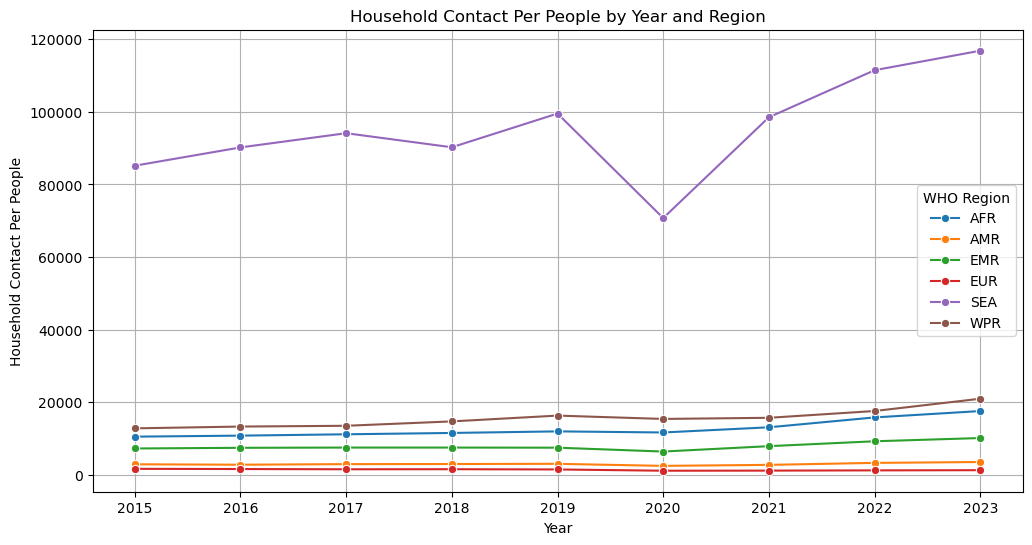

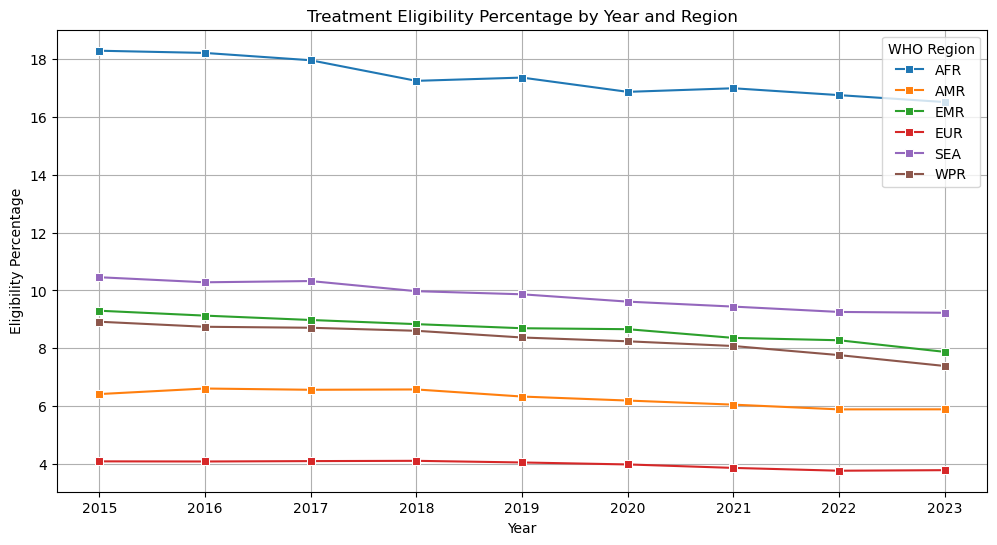

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot for household_contact_rate trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=year_region_agg, x='year', y='household_contact_per_people', hue='g_whoregion', marker='o')
plt.title('Household Contact Per People by Year and Region')
plt.xlabel('Year')
plt.ylabel('Household Contact Per People')
plt.legend(title='WHO Region')
plt.grid()
plt.show()

# Line plot for eligible_pct trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=year_region_agg, x='year', y='eligible_percent', hue='g_whoregion', marker='s')
plt.title('Treatment Eligibility Percentage by Year and Region')
plt.xlabel('Year')
plt.ylabel('Eligibility Percentage')
plt.legend(title='WHO Region')
plt.grid()
plt.show()
